In [2]:
%%capture

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import os
import glob

In [3]:
from google.colab import files
uploaded = files.upload()

Saving stopwords-check.txt to stopwords-check.txt
Saving tokens_freq_2021_Jul_Oct.json to tokens_freq_2021_Jul_Oct.json
Saving tokens_freq_2021_Jul_Oct_RAKE.json to tokens_freq_2021_Jul_Oct_RAKE.json
Saving tokens_freq_2021_Jul_Oct_tfidf.json to tokens_freq_2021_Jul_Oct_tfidf.json
Saving tokens_freq_2022_Feb_Apr.json to tokens_freq_2022_Feb_Apr.json
Saving tokens_freq_2022_Feb_Apr_RAKE.json to tokens_freq_2022_Feb_Apr_RAKE.json
Saving tokens_freq_2022_Feb_Apr_tfidf.json to tokens_freq_2022_Feb_Apr_tfidf.json
Saving tokens_freq_2022_May_Jul.json to tokens_freq_2022_May_Jul.json
Saving tokens_freq_2022_May_Jul_RAKE.json to tokens_freq_2022_May_Jul_RAKE.json
Saving tokens_freq_2022_May_Jul_tfidf.json to tokens_freq_2022_May_Jul_tfidf.json
Saving tokens_freq_Nov2021_Jan2022.json to tokens_freq_Nov2021_Jan2022.json
Saving tokens_freq_Nov2021_Jan2022_RAKE.json to tokens_freq_Nov2021_Jan2022_RAKE.json
Saving tokens_freq_Nov2021_Jan2022_tfidf.json to tokens_freq_Nov2021_Jan2022_tfidf.json


In [4]:
def format_input(user_key, stopwords):
  '''
  format user input request to lookup in the database of frequencies

  input:  
    user_key is a string
    stopwords is a list of strings
  output: 
    key is a string
  '''

  key = user_key.lower()
  key = re.sub(r'[^\w\s]', ' ', key)

  key = ' '.join([el for el in key.split() if not (el in stopwords)])


  return key


In [5]:
it_stop = []

with open('/content/stopwords-check.txt', 'r') as fp:
  for line in fp:
    it_stop.append(line.rstrip())


#print(it_stop[:5])
print(len(it_stop))

702


In [6]:
'''
ser = []

ser.append(pd.read_json('/content/tokens_freq_2021_Jul_Oct.json', typ='series'))
ser.append(pd.read_json('/content/tokens_freq_Nov2021_Jan2022.json', typ='series'))
ser.append(pd.read_json('/content/tokens_freq_2022_Feb_Apr.json', typ='series'))
ser.append(pd.read_json('/content/tokens_freq_2022_May_Jul.json', typ='series'))
'''

"\nser = []\n\nser.append(pd.read_json('/content/tokens_freq_2021_Jul_Oct.json', typ='series'))\nser.append(pd.read_json('/content/tokens_freq_Nov2021_Jan2022.json', typ='series'))\nser.append(pd.read_json('/content/tokens_freq_2022_Feb_Apr.json', typ='series'))\nser.append(pd.read_json('/content/tokens_freq_2022_May_Jul.json', typ='series'))\n"

In [37]:
# two input variables. <user_keys> are the keywords to lookup for frequencies. It is a list of strings. 
# <user_choice> is the choice of the method for frequency calucation ('from_whole_text', 'TF-IDF', 'RAKE')

user_keys = ['Stanchezza', "l'età",'mal di testa', '#LongCovidKids']
#user_keys = ['nebbia cognitiva', 'mal di testa', 'Dura PROVA']


user_choice = 'whole_text' #possible choices: 'whole_text', 'TF-IDF', 'RAKE'

In [38]:
# clean input strings to match keywords in the database
keyword = []
for key in user_keys:
  keyword.append(format_input(key, it_stop))

In [39]:
# loading the json files corresponding to <user_choice> of frequency calculation method

ser = []
json_dir_name = '/content'

if user_choice == 'whole_text':
  json_pattern = os.path.join(json_dir_name, '*[t2rl].json')

if user_choice == 'TF-IDF':
  json_pattern = os.path.join(json_dir_name, '*_tfidf.json')

if user_choice == 'RAKE':
  json_pattern = os.path.join(json_dir_name, '*_RAKE.json')

file_list = sorted(glob.glob(json_pattern))
for i in range(4):
  print(i, str(file_list[i]))
ser.append(pd.read_json(file_list[0], typ='series'))
ser.append(pd.read_json(file_list[3], typ='series'))
ser.append(pd.read_json(file_list[1], typ='series'))
ser.append(pd.read_json(file_list[2], typ='series'))

0 /content/tokens_freq_2021_Jul_Oct.json
1 /content/tokens_freq_2022_Feb_Apr.json
2 /content/tokens_freq_2022_May_Jul.json
3 /content/tokens_freq_Nov2021_Jan2022.json


In [40]:
print(len(ser[0]))
print(str(file_list[0]),str(file_list[3]),str(file_list[1]),str(file_list[2]))
#print(ser[0][8100:8150])

500
/content/tokens_freq_2021_Jul_Oct.json /content/tokens_freq_Nov2021_Jan2022.json /content/tokens_freq_2022_Feb_Apr.json /content/tokens_freq_2022_May_Jul.json



 input:  stanchezza
1 quarter:  0.066390041493775
2 quarter:  0.050131926121372
3 quarter:  0.12868632707774802
4 quarter:  0.10116731517509701

 input:  l'età
1 quarter:  0.134854771784232
2 quarter:  0.06464379947229501
3 quarter:  0.11260053619302901
4 quarter:  0.12062256809338501

 input:  mal di testa
1 quarter:  no value
2 quarter:  0.035620052770448
3 quarter:  0.11796246648793501
4 quarter:  0.08560311284046601

 input:  #longcovidkids
1 quarter:  0.180497925311203
2 quarter:  0.12532981530343001
3 quarter:  0.166219839142091
4 quarter:  0.066147859922178


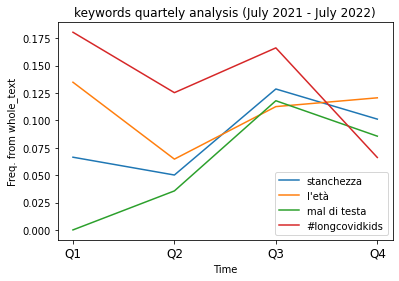

In [41]:
x = np.arange(2,10,2)

y = [[] for j in range(len(keyword))]
for j in range(len(keyword)):
  i=0
  print('\n','input: ', user_keys[j].lower())
  while i < len(ser):
    try:
      y[j].append(ser[i][keyword[j]])
      print(f'{i+1} quarter: ', ser[i][keyword[j]])
      i += 1
    except:
      y[j].append(0.0)
      print(f'{i+1} quarter: ', 'no value')
      i += 1

  y[j] = np.array(y[j])
  

x_ticks_labels = ['Q1','Q2','Q3','Q4']

fig, ax = plt.subplots(1,1) 

for j in range(len(keyword)):
  ax.plot(x,y[j], label = user_keys[j].lower())


# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_xticklabels(x_ticks_labels, fontsize=12)

leg = plt.legend(loc='best')
plt.xlabel('Time')
plt.title("keywords quartely analysis (July 2021 - July 2022)")
plt.ylabel(f'Freq. from {user_choice}')
plt.savefig('prova.png', bbox_inches='tight', pad_inches = 2)
plt.show()
